In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/Training_Data.csv")
test = pd.read_csv("data/Test_Data.csv")

In [3]:
x=train['Months since Last Donation']

In [4]:
y=train['Number of Donations']

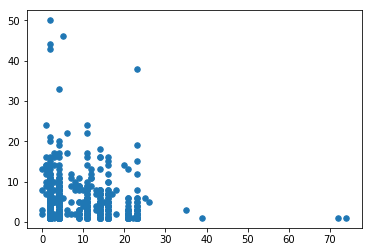

In [5]:
plt.scatter(x,y,label="stars",s=30)

In [6]:
train['months_donated']  = train['Months since First Donation']-train['Months since Last Donation']
train['months_donated']  = test['Months since First Donation']-test['Months since Last Donation']

In [7]:
train.groupby('Made Donation in March 2007').mean()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 6,Unnamed: 7,months_donated
Made Donation in March 2007,,,,,,,,
0,368.933790,10.636986,4.716895,1179.223744,34.319635,NaN,NaN,27.698413
1,390.224638,5.637681,7.681159,1920.289855,33.195652,NaN,NaN,23.054054


In [8]:
train[['ID', 'Made Donation in March 2007']].groupby('Made Donation in March 2007').count()

,ID
Made Donation in March 2007,
0,438
1,138


In [9]:
X = train['Months since Last Donation']+train['Months since First Donation']+train['Number of Donations']
X = np.reshape(X,(X.size,1))

c:\users\ajitesh\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [10]:
y= train['Made Donation in March 2007']

In [11]:
np.ravel(y)

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
from sklearn.tree import DecisionTreeRegressor
model  = DecisionTreeRegressor(random_state=0)
model = model.fit(X,y)
model.score(X,y)

0.2018677005615579

In [16]:
train['Intercept']=1

In [17]:
predictions  = model.predict_proba(X)

In [18]:
predictions_donate = predictions[:200,1]
print(predictions_donate.shape)

(200,)


In [19]:
results = pd.DataFrame(test['ID'].copy())
print(results.size)

200


In [20]:
type(results)

pandas.core.frame.DataFrame

In [21]:
results['Made Donation in March 2007'] = predictions_donate

In [22]:
results.head(3)

,ID,Made Donation in March 2007
0,659,0.174231
1,276,0.246398
2,263,0.238282


In [23]:
results.to_csv('data/results.csv',index_label=id,index=False)

In [24]:
len(results)

200